In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df_path = './data/processed/v1.csv'

In [6]:
df = pd.read_csv(df_path)

In [13]:
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date

In [18]:
df.shape

(1112, 3)

In [19]:
df.head()

,time,tier,ban
0,2019-11-27 17:01:36,10,Strix
1,2019-11-27 17:01:36,10,Willo
2,2019-11-27 17:01:36,10,Maeve
3,2019-11-27 17:01:36,10,Moji
4,2019-11-27 04:35:29,11,Viktor


In [161]:
bans = []
for hero in df['ban'].unique():
    bans.append((len(df[df['tier'] == 25][df['ban'] == hero].index), hero))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [162]:
bans.sort(reverse=True)

In [163]:
nums = [a[0] for a in bans]
names = [a[1] for a in bans]

<BarContainer object of 20 artists>

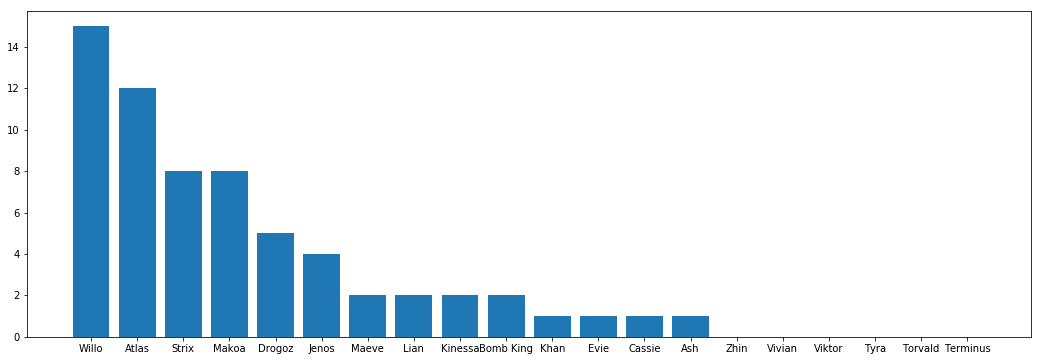

In [164]:
plt.figure(figsize=(18, 6))
plt.bar(height=nums[:20], x=names[:20])

In [112]:
df['tier'].unique()

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [176]:
df[df['tier'] == 17].groupby('ban').count()['time']

2

In [181]:
df[df['tier'] == 17].groupby('ban').count().index

Index(['Androxus', 'Atlas', 'Barik', 'Bomb King', 'Drogoz', 'Evie', 'Jenos',
       'Khan', 'Kinessa', 'Koga', 'Maeve', 'Makoa', 'Moji', 'Raum', 'Seris',
       'Strix', 'Talus', 'Torvald', 'Tyra', 'Vivian', 'Willo', 'Zhin'],
      dtype='object', name='ban')

<BarContainer object of 20 artists>

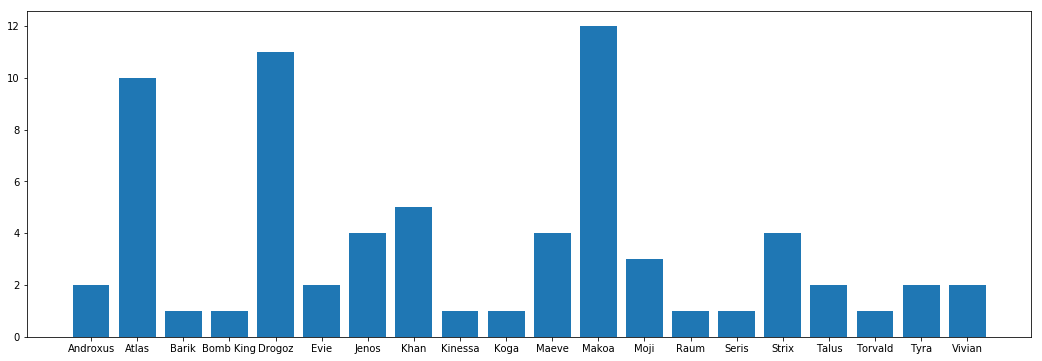

In [182]:


plt.figure(figsize=(18, 6))
plt.bar(height=df[df['tier'] == 17].groupby('ban').count()['time'][:20], x=df[df['tier'] == 17].groupby('ban').count().index[:20])

In [184]:
val = 13

In [186]:
data_selection = df[df['tier'] == val].groupby('ban').count()
print((data_selection['time'], data_selection.index))
x, y = sorted((data_selection['time'], data_selection.index), reverse=True)

(ban
Atlas     6
Drogoz    1
Evie      2
Jenos     1
Khan      2
Maeve     3
Makoa     5
Raum      1
Strix     3
Tyra      2
Vivian    1
Willo     5
Name: time, dtype: int64, Index(['Atlas', 'Drogoz', 'Evie', 'Jenos', 'Khan', 'Maeve', 'Makoa', 'Raum',
       'Strix', 'Tyra', 'Vivian', 'Willo'],
      dtype='object', name='ban'))


TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

In [189]:
data_selection['time']

ban
Atlas     6
Drogoz    1
Evie      2
Jenos     1
Khan      2
Maeve     3
Makoa     5
Raum      1
Strix     3
Tyra      2
Vivian    1
Willo     5
Name: time, dtype: int64

In [195]:
val = 13

In [221]:
data_selection = df[df['tier'] == val].groupby('ban').count()['time']
x = df['ban'].unique()
x.sort()
y = [0] * len(x)
data = dict(zip(x, y))



In [222]:
data

{'Androxus': 0,
 'Ash': 0,
 'Atlas': 0,
 'Barik': 0,
 'Bomb King': 0,
 'Buck': 0,
 'Cassie': 0,
 'Dredge': 0,
 'Drogoz': 0,
 'Evie': 0,
 'Furia': 0,
 'Grover': 0,
 'Imani': 0,
 'Inara': 0,
 'Io': 0,
 'Jenos': 0,
 'Khan': 0,
 'Kinessa': 0,
 'Koga': 0,
 'Lex': 0,
 'Lian': 0,
 'Maeve': 0,
 'Makoa': 0,
 'Moji': 0,
 'Pip': 0,
 'Raum': 0,
 'Seris': 0,
 'Skye': 0,
 'Strix': 0,
 'Talus': 0,
 'Terminus': 0,
 'Torvald': 0,
 'Tyra': 0,
 'Viktor': 0,
 'Vivian': 0,
 'Willo': 0,
 'Zhin': 0}

In [218]:
x

array(['Androxus', 'Ash', 'Atlas', 'Barik', 'Bomb King', 'Buck', 'Cassie',
       'Dredge', 'Drogoz', 'Evie', 'Furia', 'Grover', 'Imani', 'Inara',
       'Io', 'Jenos', 'Khan', 'Kinessa', 'Koga', 'Lex', 'Lian', 'Maeve',
       'Makoa', 'Moji', 'Pip', 'Raum', 'Seris', 'Skye', 'Strix', 'Talus',
       'Terminus', 'Torvald', 'Tyra', 'Viktor', 'Vivian', 'Willo', 'Zhin'],
      dtype=object)

In [225]:
for k in data_selection.keys():
    print(k)

Atlas
Drogoz
Evie
Jenos
Khan
Maeve
Makoa
Raum
Strix
Tyra
Vivian
Willo


In [233]:
df['n'] = 1
val_ = 20

In [238]:
data_selection = df[(df['tier'] >= val) & (df['tier'] <= val_)].groupby('ban').count()

In [239]:
data_selection

,time,tier,date,n
ban,,,,
Androxus,3,3,3,3
Ash,1,1,1,1
Atlas,83,83,83,83
Barik,5,5,5,5
Bomb King,12,12,12,12
Buck,1,1,1,1
Cassie,3,3,3,3
Dredge,5,5,5,5
Drogoz,50,50,50,50


In [247]:

tiers = dict('Bronze V'1)

SyntaxError: keyword can't be an expression (<ipython-input-247-66cb12a12dbc>, line 2)

In [248]:
tiers = {'Bronze V': 1, 'Bronze IV': 2, 'Bronze III': 3, 'Bronze II': 4, 'Bronze I': 5,
         'Silver V': 6, 'Silver IV': 7, 'Silver III': 8, 'Silver II': 9, 'Silver I': 10,
         'Gold V': 11, 'Gold IV': 12, 'Gold III': 13, 'Gold II': 14, 'Gold I': 15,
         'Platinum V': 16, 'Platinum IV': 17, 'Platinum III': 18, 'Platinum II': 19, 'Platinum I': 20,
         'Diamond V': 21, 'Diamond IV': 22, 'Diamond III': 23, 'Diamond II': 24, 'Diamond I': 25,
         'Masters I': 26, 'Grandmaster': 27}

In [255]:
for k in tiers:
    print(str(tiers[k]) + ":" + "'" + str(k) + "',")

1:'Bronze V',
2:'Bronze IV',
3:'Bronze III',
4:'Bronze II',
5:'Bronze I',
6:'Silver V',
7:'Silver IV',
8:'Silver III',
9:'Silver II',
10:'Silver I',
11:'Gold V',
12:'Gold IV',
13:'Gold III',
14:'Gold II',
15:'Gold I',
16:'Platinum V',
17:'Platinum IV',
18:'Platinum III',
19:'Platinum II',
20:'Platinum I',
21:'Diamond V',
22:'Diamond IV',
23:'Diamond III',
24:'Diamond II',
25:'Diamond I',
26:'Masters I',
27:'Grandmaster',
